In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("yuriykatser/skoltech-anomaly-benchmark-skab")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\liuyi\.cache\kagglehub\datasets\yuriykatser\skoltech-anomaly-benchmark-skab\versions\1


In [24]:
# 遍历下载目录以查找所有 CSV 文件
csv_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

# 筛选并排序包含异常标注的文件
# --- 修改这里的索引 (0 到 34) 来查看不同的文件 ---
    file_idx = 23
# ------------------------------------------------------------------
anomaly_files = sorted([f for f in csv_files if 'anomaly_free' not in f])

if anomaly_files:
    print(f"找到 {len(anomaly_files)} 个包含异常标注的文件。")

    selected_file = anomaly_files[file_idx]
    df = pd.read_csv(selected_file, sep=';', index_col='datetime', parse_dates=True)
    print(f"\n已成功加载索引 [{file_idx}]: {os.path.relpath(selected_file, path)}")
    display(df.head())
else:
    print("未找到带异常标注的 CSV 文件，请检查数据集路径。")

找到 35 个包含异常标注的文件。

已成功加载索引 [23]: SKAB\valve1\2.csv


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-09 10:54:34,0.026990,0.040407,1.015510,0.382638,72.9570,25.6198,231.276,31.001,0.0,0.0
2020-03-09 10:54:35,0.026836,0.039138,1.020390,0.054711,72.8664,25.6185,226.683,31.999,0.0,0.0
2020-03-09 10:54:36,0.026597,0.040146,0.733759,0.054711,72.8498,25.6157,231.091,31.001,0.0,0.0
2020-03-09 10:54:37,0.027161,0.040001,1.073280,0.382638,72.7915,25.6115,236.156,31.999,0.0,0.0
2020-03-09 10:54:38,0.026702,0.039407,1.106890,0.054711,72.9818,25.6171,207.464,31.001,0.0,0.0


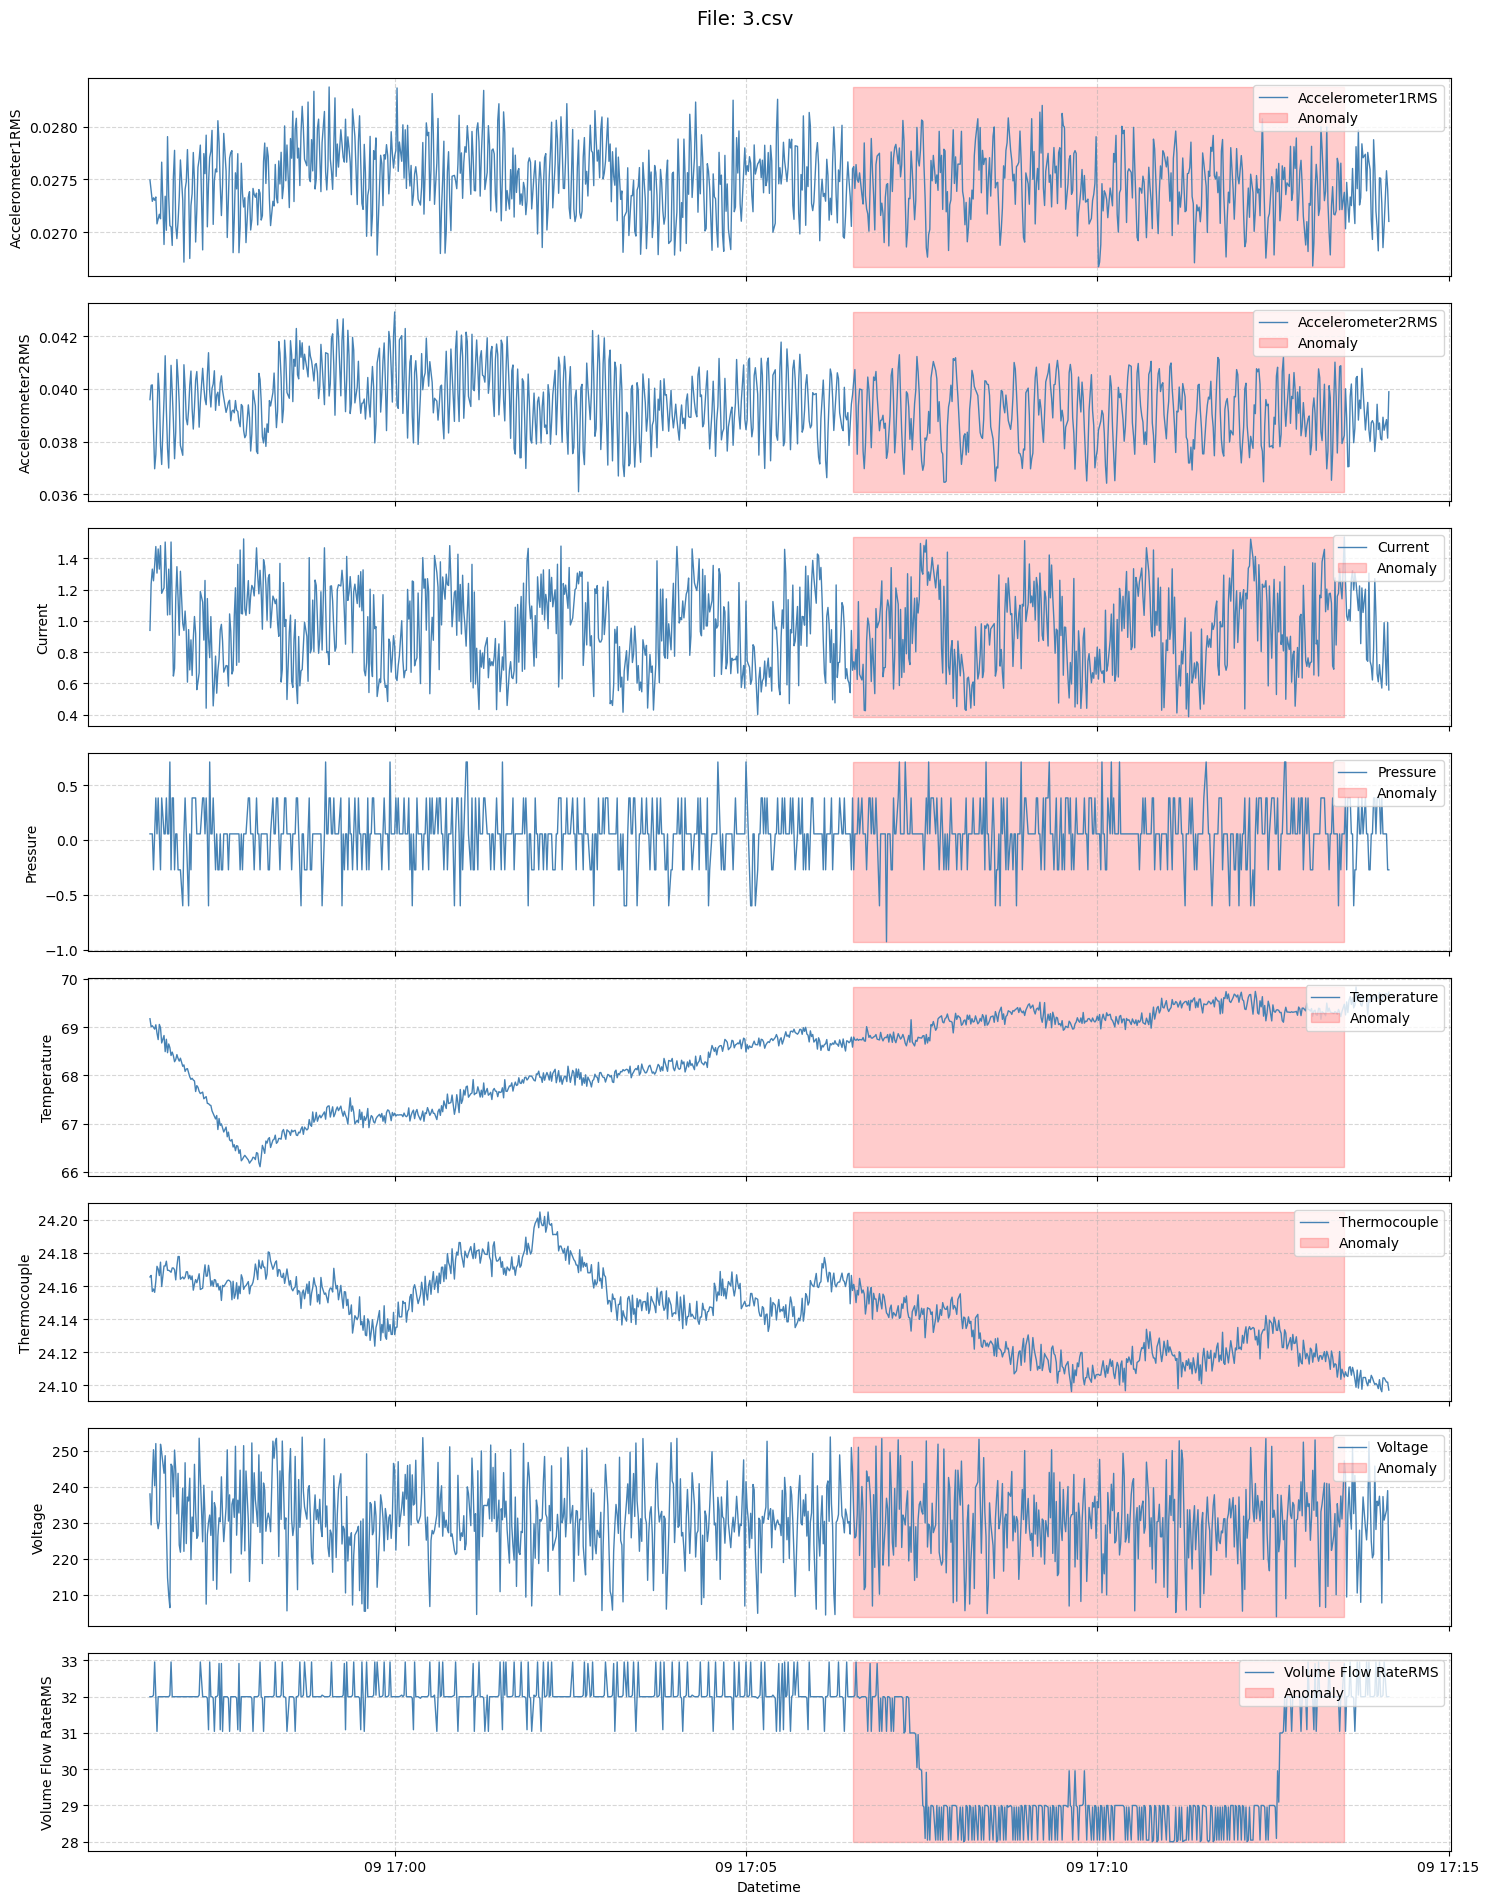

In [23]:
import matplotlib.pyplot as plt

def visualize_skab_data(data, title="SKAB Sensor Signals"):
    # 1. 确定传感器列
    sensor_columns = [col for col in data.columns if col not in ['anomaly', 'changepoint']]

    # 2. 创建子图
    fig, axes = plt.subplots(nrows=len(sensor_columns), ncols=1, 
                             figsize=(15, 2.5 * len(sensor_columns)), 
                             sharex=True, squeeze=False)

    for i, col in enumerate(sensor_columns):
        ax = axes[i, 0]
        ax.plot(data.index, data[col], label=col, color='steelblue', linewidth=1)
        
        # 3. 使用红色阴影标记异常区域
        if 'anomaly' in data.columns:
            ax.fill_between(data.index, data[col].min(), data[col].max(), 
                            where=data['anomaly'] == 1, color='red', alpha=0.2, label='Anomaly')
        
        ax.set_ylabel(col)
        ax.legend(loc='upper right')
        ax.grid(True, linestyle='--', alpha=0.5)

    plt.xlabel('Datetime')
    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

# 调用函数进行可视化
if 'df' in locals():
    visualize_skab_data(df, title=f"File: {os.path.basename(selected_file)}")